In [1]:
import pandas as pd

file_path = './data/filtered_data.csv'
data = pd.read_csv(file_path)
print(data.head())


   Sex   Age  BodyweightKg AgeClass  Squat1Kg  Squat2Kg  Squat3Kg  \
0    1  19.0          73.1    18-19     210.0    -220.0    -220.0   
1    1  28.0          74.9    24-34     190.0     200.0     210.0   
2    1  19.0          74.1    18-19     150.0     160.0     165.0   
3    1  25.0          74.2    24-34     255.0     275.0     290.0   
4    1  21.0          74.9    20-23     200.0     217.5    -225.0   

   Best3SquatKg  Bench1Kg  Bench2Kg  Bench3Kg  Best3BenchKg  Deadlift1Kg  \
0         210.0    -120.0    -120.0     120.0         120.0       -250.0   
1         210.0     135.0     140.0     142.5         142.5        250.0   
2         165.0     125.0    -132.5     135.0         135.0        225.0   
3         290.0     160.0     170.0     175.0         175.0        270.0   
4         217.5     110.0     120.0    -127.5         120.0        217.5   

   Deadlift2Kg  Deadlift3Kg  Best3DeadliftKg  
0       -250.0        250.0            250.0  
1       -265.0       -270.0       

In [4]:
print(data.info())
data = data.dropna(subset=['Age', 'BodyweightKg', 'Best3SquatKg'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42946 entries, 0 to 42945
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sex              42946 non-null  int64  
 1   Age              42946 non-null  float64
 2   BodyweightKg     42946 non-null  float64
 3   AgeClass         42936 non-null  object 
 4   Squat1Kg         23772 non-null  float64
 5   Squat2Kg         23566 non-null  float64
 6   Squat3Kg         22990 non-null  float64
 7   Best3SquatKg     42946 non-null  float64
 8   Bench1Kg         23769 non-null  float64
 9   Bench2Kg         23585 non-null  float64
 10  Bench3Kg         22876 non-null  float64
 11  Best3BenchKg     42946 non-null  float64
 12  Deadlift1Kg      23788 non-null  float64
 13  Deadlift2Kg      23489 non-null  float64
 14  Deadlift3Kg      22442 non-null  float64
 15  Best3DeadliftKg  42946 non-null  float64
dtypes: float64(14), int64(1), object(1)
memory usage: 5.2+ MB


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Preparing the data
X = data[['Age', 'BodyweightKg']]
y = data['Best3SquatKg']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to train and evaluate a model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f'Model: {model.__class__.__name__}, MSE: {mse}')

# Models to train
models = [LinearRegression(), Ridge(), Lasso(), DecisionTreeRegressor()]

# Train and evaluate each model
for model in models:
    train_and_evaluate_model(model, X_train, X_test, y_train, y_test)


Model: LinearRegression, MSE: 1988.9789745824803
Model: Ridge, MSE: 1988.979004991912
Model: Lasso, MSE: 1989.572083104777
Model: DecisionTreeRegressor, MSE: 2076.235927649455


Root Mean Squared Error: 41.24864061203353


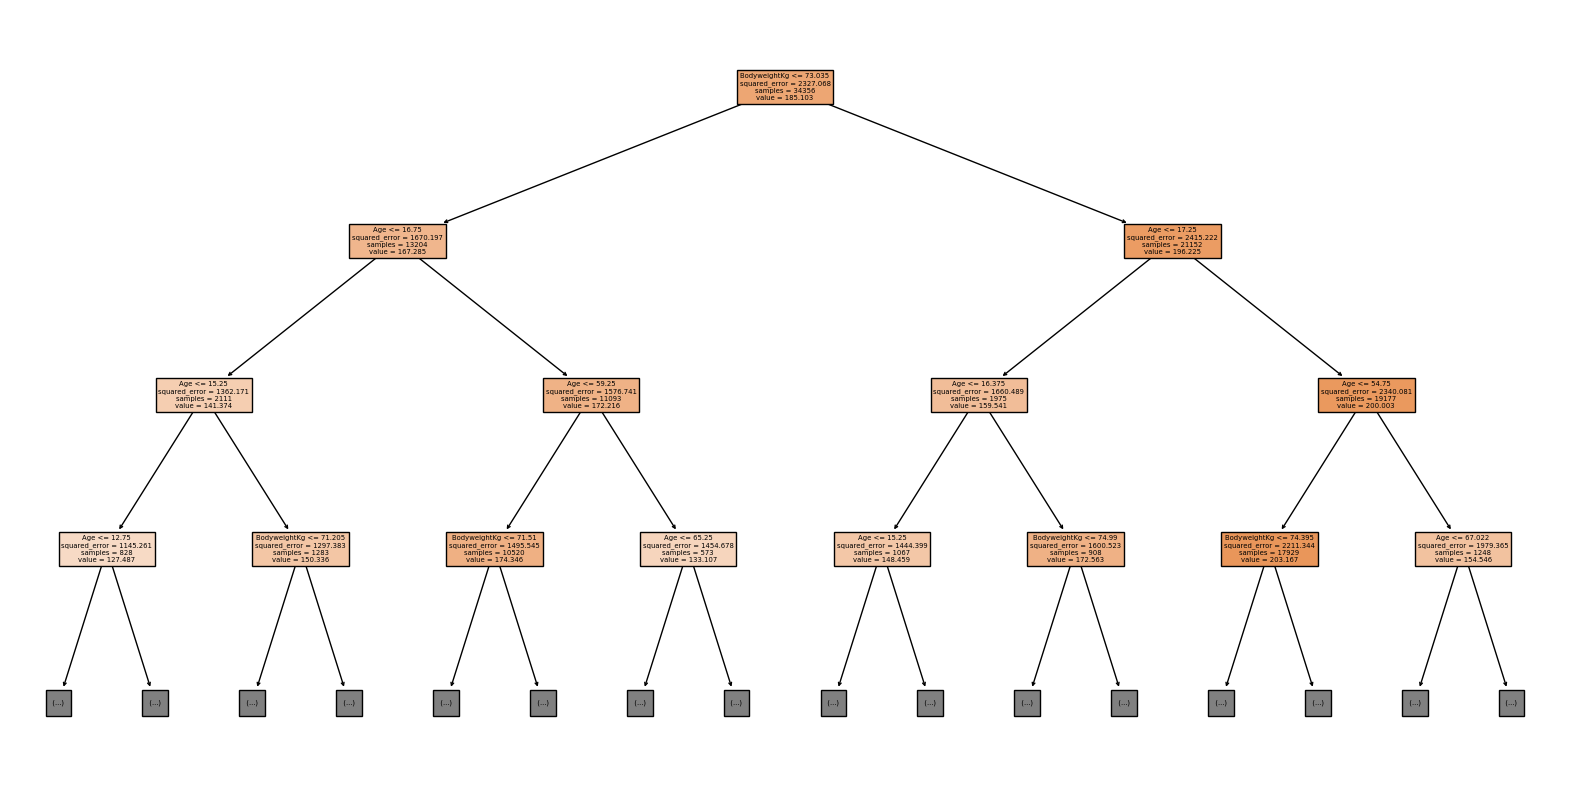

In [10]:
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

features = data[['Age', 'BodyweightKg']]
target = data['Best3SquatKg']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Pruning the tree by setting max_depth
tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)

predictions = tree_model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, predictions))
print(f'Root Mean Squared Error: {rmse}')

# Visualize the tree (simplified)
plt.figure(figsize=(20,10))
plot_tree(tree_model, feature_names=['Age', 'BodyweightKg'], filled=True, max_depth=3)
plt.show()



In [13]:
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming 'data' is your DataFrame

features = data[['Age', 'BodyweightKg']]
target = data['Best3SquatKg']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Generating polynomial features
poly_degree = 2
poly_features = PolynomialFeatures(degree=poly_degree)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Training the model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Making predictions and evaluating the model
predictions = poly_model.predict(X_test_poly)

# Evaluation metrics
rmse = sqrt(mean_squared_error(y_test, predictions))
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Print the report
print(f"Evaluation Metrics for Polynomial Regression (Degree {poly_degree}):")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Evaluation Metrics for Polynomial Regression (Degree 2):
Root Mean Squared Error (RMSE): 42.11
Mean Squared Error (MSE): 1773.08
Mean Absolute Error (MAE): 32.97
R-squared (R²): 0.21
